# Chapter 10: Data Aggregation and Group Operations


### Vroom vroom...

- Let's take a look at some car performance and specification numbers.
- This assignment will cover:
    - FILLNA
    - MELT
    - PIVOT_TABLE
    - AGGFUNC
    - CROSSTAB

In [29]:
import pandas as pd
import numpy as np

auto_1 = pd.read_csv('../data/data1.csv')
#print('auto_1 -------------')
#print(auto_1.head(2))

origin_map = {1: 'USA', 2: 'Europe', 3: 'Asia'}
# print(origin_map)

auto_2 = pd.read_csv('../data/data2.csv')
# print('auto_2 -------------')
# print(auto_2.head(2))

auto_3 = pd.read_csv('../data/data3.csv')
# print('auto_3 -------------')
# print(auto_3.head(2))

### FILLNA

Task 1: Find the average horsepower for each car cylinder size. If horsepower doesn't have a value set then please set it to the average horsepower of all the other same sized cylinder cars. Print out a table showing the data.

Task 2: How many horsepower difference is there between the highest and lowest average from Task 1?

Requirements: fillna is required in your solution.

Use dataset: auto_1

In [30]:
#I pulled the data file into excel changed ? values for horsepower to empty cells and exported
auto_1.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [31]:
#here is a df with mean for each cylinder with the current data
mean = auto_1['horsepower'].groupby(auto_1['cylinders']).mean().reset_index()
mean.head()

,cylinders,horsepower
0,3,99.250000
1,4,78.281407
2,5,82.333333
3,6,101.506024
4,8,158.300971


In [32]:
#Here are the rows with null horsepower
missing = auto_1[auto_1['horsepower'].isna()].reset_index()
missing

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
1,126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
2,330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
3,336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
4,354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
5,374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [33]:
def meanItem (which):
    val = mean.loc[mean['cylinders'] == which ].horsepower.item()
    return val 

In [34]:
print(meanItem(3)) #3 cylinders should return 99.25

99.25


In [35]:
#what are the unique cylinders
cylArray = auto_1['cylinders'].unique()
cylArray

array([8, 4, 6, 3, 5])

In [36]:
#iterate each number of cylinders and call a method that will retrieve the average and update using fillna
for x in cylArray:
    avg = meanItem(x)
    auto_1.loc[auto_1['cylinders'] == x, 'horsepower'] = \
        auto_1.loc[auto_1['cylinders'] == x, 'horsepower'].fillna(avg)

In [37]:
missing = auto_1[auto_1['horsepower'].isna()].reset_index()
missing.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [38]:
auto_1.head(127)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.000000,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.000000,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.000000,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.000000,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.000000,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.000000,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.000000,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.000000,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.000000,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.000000,3850,8.5,70,1,amc ambassador dpl


In [39]:
#task 2 -- after doing fillna we can see that the mean is the same....
mean2 = auto_1['horsepower'].groupby(auto_1['cylinders']).mean().reset_index()
mean2.head()

,cylinders,horsepower
0,3,99.250000
1,4,78.281407
2,5,82.333333
3,6,101.506024
4,8,158.300971


In [40]:
#task2 -- here is the diff in hp between highest and lowest
mean2.loc[mean2.idxmax()['horsepower'], 'horsepower'] - mean2.loc[mean2.idxmin()['horsepower'], 'horsepower']

80.01956383861052

### MELT

Task 1: Use dataset auto_2 and graph only Merc cars showing performance metrics: qsec, vs, am, carb, carb, cyl

Requirements: melt is required in your solution.

Use dataset auto_2

In [41]:
#Probably want to filter for Mercs and then melt that result on Name - then graph
auto_2.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
#Here are the Mercs
test = auto_2[auto_2['name'].str.contains("Merc")]
test.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3


In [43]:
#Here is the melt
test = pd.melt(test, id_vars=['name'], value_vars=['qsec', 'vs', 'am', 'carb', 'cyl'])
test.head()

,name,variable,value
0,Merc 240D,qsec,20.0
1,Merc 230,qsec,22.9
2,Merc 280,qsec,18.3
3,Merc 280C,qsec,18.9
4,Merc 450SE,qsec,17.4


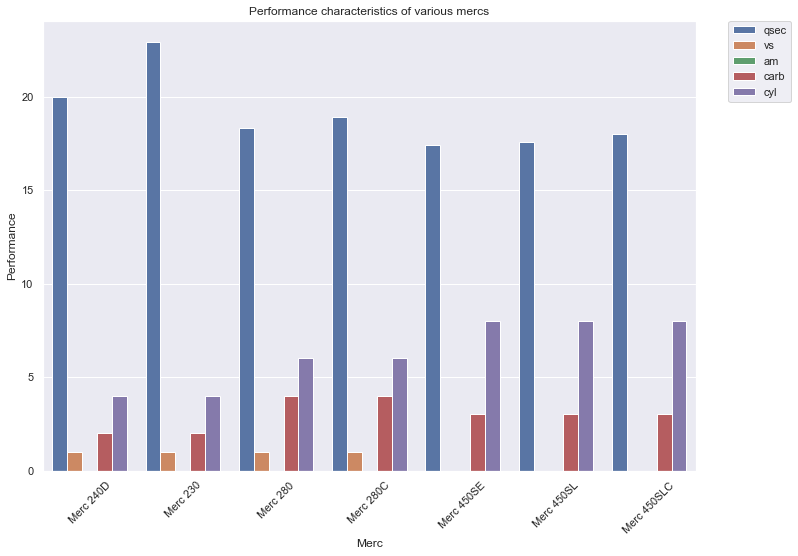

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.barplot(data=test,x='name', y='value', hue='variable');
ax.set_ylabel("Performance")
ax.set_xlabel("Merc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Performance characteristics of various mercs')
plt.show();


### PIVOT_TABLE and AGGFUNC

Task 1: Display a table showing the averages of MPG per model year broken down by cylinder and origin.

Task 2: Plot a line graph showing the average MPG per year for 4 cylinder engine cars by manufacture location.

Requirements: pivot_table and aggfunc is required in your solution.

Use dataset auto_1 and origin_map

In [45]:
#Set a country column from the origin_map
origin_map
auto_1['country'] = auto_1['origin'].map(origin_map)
auto_1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,country
0,18.0,8,307.0,130.000000,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.000000,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.000000,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.000000,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.000000,3449,10.5,70,1,ford torino,USA
5,15.0,8,429.0,198.000000,4341,10.0,70,1,ford galaxie 500,USA
6,14.0,8,454.0,220.000000,4354,9.0,70,1,chevrolet impala,USA
7,14.0,8,440.0,215.000000,4312,8.5,70,1,plymouth fury iii,USA
8,14.0,8,455.0,225.000000,4425,10.0,70,1,pontiac catalina,USA
9,15.0,8,390.0,190.000000,3850,8.5,70,1,amc ambassador dpl,USA


In [46]:
#Task 1: Display a table showing the averages of MPG per model year broken down by cylinder and origin.
#auto_1.pivot_table(values='mpg', index='cylinders',columns='country', aggfunc='mean')
auto_1.pivot_table(values='mpg', index='country',columns='cylinders', aggfunc='mean')

cylinders,3,4,5,6,8
country,,,,,
Asia,20.55,31.595652,NaN,23.883333,NaN
Europe,NaN,28.411111,27.366667,20.100000,NaN
USA,NaN,27.840278,NaN,19.663514,14.963107


In [71]:
#Task 2: Plot a line graph showing the average MPG per year for 4 cylinder engine cars by manufacture location.
test = auto_1.loc[auto_1['cylinders'] == 4].pivot_table(values='mpg', index='model_year',columns='country', aggfunc='mean', fill_value=0)
test

country,Asia,Europe,USA
model_year,,,
70,25.500000,25.200000,0.000000
71,29.500000,28.750000,24.800000
72,25.500000,22.000000,23.200000
73,21.000000,24.000000,20.000000
74,29.333333,27.000000,26.333333
75,27.500000,24.500000,23.000000
76,31.000000,25.357143,26.200000
77,30.250000,29.250000,28.250000
78,29.687500,32.066667,28.183333


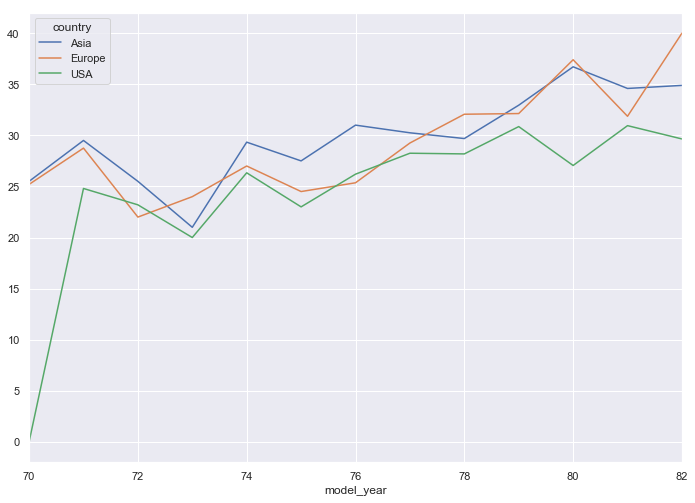

In [72]:
test.plot.line();

### CROSSTAB

Task 1: Display a table showing the car totals by door count broken down by car make and vehicle size.

Requirements: crossbtab is required in your solution.

Use dataset auto_3

In [73]:
auto_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [85]:
pd.crosstab([auto_3['Make'],auto_3['Vehicle Size']], auto_3['Number of Doors'])

Number of Doors            2.0  3.0  4.0
Make         Vehicle Size               
Acura        Compact        33    0   29
             Midsize        15    0  175
Alfa Romeo   Compact         5    0    0
Aston Martin Compact        49    0    0
             Large           0    0    7
             Midsize        37    0    0
Audi         Compact        63    0   64
             Large           0    0   42
             Midsize        24    0  135
BMW          Compact        67    0    7
             Large           0    0   78
             Midsize        73    0  109
Bentley      Large          12    0   25
             Midsize        37    0    0
Bugatti      Compact         3    0    0
Buick        Compact         4    0   28
             Large           4    0   63
             Midsize         8    0   89
Cadillac     Compact        51    0   18
             Large           7    0  220
             Midsize        21    0   80
Chevrolet    Compact       145   23  260
             Large         118   24  275
             Midsize        48   26  204
Chrysler     Compact        26    0   11
             Large           0    0   76
             Midsize         9    0   65
Dodge        Compact        81    9  114
             Large         122   10  124
             Midsize        28   13  125
...                        ...  ...  ...
Oldsmobile   Midsize        18    0   70
Plymouth     Compact        31    0   30
             Large           0    0    8
             Midsize         0    3   10
Pontiac      Compact        39    3   32
             Large           0    0   16
             Midsize        34    1   61
Porsche      Compact        92    0    0
             Large           0    0   22
             Midsize         0    0   22
Rolls-Royce  Large          11    0   20
Saab         Compact        29    0   27
             Large           0    0    5
             Midsize         0    0   50
Scion        Compact        30    0   30
Spyker       Compact         3    0    0
Subaru       Compact        29    0  123
             Midsize         0    0  104
Suzuki       Compact        31    0  211
             Midsize         0    0  109
Tesla        Large           0    0   13
Toyota       Compact        86   16  187
             Large          26    0  207
             Midsize        32    0  192
Volkswagen   Compact       306    0  225
             Large           0   17   11
             Midsize         0    0  250
Volvo        Compact         9    0   18
             Large           0    0   19
             Midsize         3    0  232

[115 rows x 3 columns]